# 🌼 Task 6: K-Nearest Neighbors (KNN) Classifier - Iris Dataset


This notebook implements and visualizes a **K-Nearest Neighbors (KNN)** classifier on the Iris dataset to demonstrate basic classification using distance-based learning.

We will:
- Load and preprocess the dataset
- Normalize features
- Train a KNN model and tune `k`
- Evaluate performance with accuracy & confusion matrix
- Visualize decision boundaries


In [4]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [5]:

# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

# Convert to DataFrame
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y
df['target_name'] = df['target'].apply(lambda x: target_names[x])
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [6]:

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


In [7]:

# Train KNN with k=3
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Predict
y_pred = knn.predict(X_test)


✅ Accuracy (k=3): 1.00
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



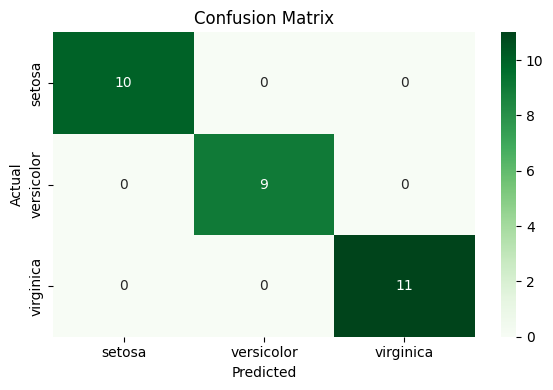

In [8]:

# Accuracy & classification report
acc = accuracy_score(y_test, y_pred)
print(f"✅ Accuracy (k=3): {acc:.2f}")
print(classification_report(y_test, y_pred, target_names=target_names))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", xticklabels=target_names, yticklabels=target_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.savefig("confusion-matrix.png")
plt.show()


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# Load and prepare dataset
df = pd.read_csv("Iris Species.csv")
X = df.drop('Species', axis=1)
y = df['Species']

# Encode labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_encoded, test_size=0.2, random_state=42
)


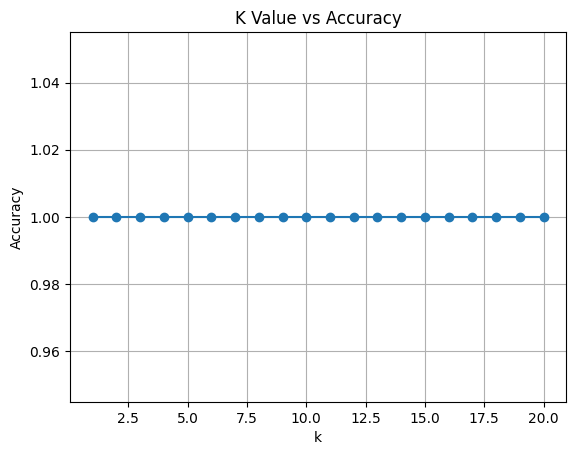

🔍 Best Accuracy: 1.00 at k = 1


In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

k_range = range(1, 21)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_k_pred = knn.predict(X_test)
    scores.append(accuracy_score(y_test, y_k_pred))

# Plot
plt.plot(k_range, scores, marker='o')
plt.title("K Value vs Accuracy")
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.grid(True)
plt.savefig("k-accuracy-curve.png")
plt.show()

print(f"🔍 Best Accuracy: {max(scores):.2f} at k = {scores.index(max(scores)) + 1}")


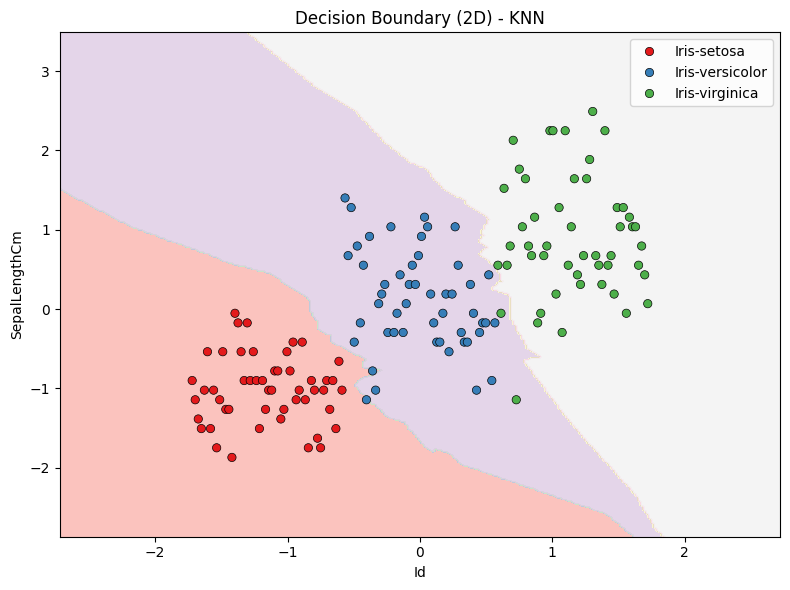

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd

# Load dataset
df = pd.read_csv("Iris Species.csv")
X = df.drop("Species", axis=1)
y = df["Species"]

# Encode target labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Use first 2 features for 2D plotting
X_2d = X.iloc[:, :2]

# Scale features
scaler = StandardScaler()
X_2d_scaled = scaler.fit_transform(X_2d)

# Train-test split
X_train2d, X_test2d, y_train2d, y_test2d = train_test_split(
    X_2d_scaled, y_encoded, test_size=0.2, random_state=42
)

# Train KNN
knn_2d = KNeighborsClassifier(n_neighbors=5)
knn_2d.fit(X_train2d, y_train2d)

# Set up mesh grid
h = 0.02
x_min, x_max = X_2d_scaled[:, 0].min() - 1, X_2d_scaled[:, 0].max() + 1
y_min, y_max = X_2d_scaled[:, 1].min() - 1, X_2d_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Predict over mesh
Z = knn_2d.predict(np.c_[xx.ravel(), yy.ravel()])

# Convert to numeric if class names are returned
if isinstance(Z[0], str):
    Z = le.transform(Z)

Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=plt.cm.Pastel1, alpha=0.8)

# Scatter plot of real points
sns.scatterplot(
    x=X_2d_scaled[:, 0],
    y=X_2d_scaled[:, 1],
    hue=le.inverse_transform(y_encoded),
    palette='Set1',
    edgecolor='k'
)

plt.xlabel(X.columns[0])
plt.ylabel(X.columns[1])
plt.title("Decision Boundary (2D) - KNN")
plt.tight_layout()
plt.savefig("decision-boundary.png", dpi=300)
plt.show()


In [1]:
import pandas as pd
import plotly.express as px
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load the dataset
df = pd.read_csv("Iris Species.csv")
X = df.drop('Species', axis=1)
y = df['Species']

# Encode species names to integers
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Use first 3 features (e.g., SepalLengthCm, SepalWidthCm, PetalLengthCm)
X_3d = X_scaled[:, :3]  # only first 3 features

# Create DataFrame for plotting
df_3d = pd.DataFrame(X_3d, columns=['Feature1', 'Feature2', 'Feature3'])
df_3d['Species'] = le.inverse_transform(y_encoded)

# Plot with Plotly
fig = px.scatter_3d(
    df_3d,
    x='Feature1', y='Feature2', z='Feature3',
    color='Species',
    title="🌐 3D Scatter Plot of Iris Dataset (First 3 Features)",
    opacity=0.8
)

fig.update_traces(marker=dict(size=5))
fig.update_layout(margin=dict(l=0, r=0, b=0, t=40))
fig.show()

# Optional: Save image (requires `pip install kaleido`)
fig.write_image("3d-knn-iris.png", width=800, height=600)


In [2]:
# Save the 3D plot as HTML
fig.write_html("3d-knn-plot.html")


## ✅ Summary

- KNN works by finding the majority class among K nearest points.
- Normalization is important to ensure fair distance comparison.
- Best `k` value found via experimentation.

---

## 🎯 Interview Questions

1. How does the KNN algorithm work?
2. Why is normalization important in KNN?
3. How to choose the best `k` value?
4. What is the time complexity of KNN?
5. What are the pros and cons of KNN?
6. How does KNN handle multi-class classification?
7. What distance metrics can be used with KNN?

---
